<a href="https://colab.research.google.com/github/KaylumCassidy/CA/blob/main/NetEarning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Annaul Net Earning 2012-2018


Net income on average of each counties yearly

In [17]:
library(readr)
library(mgcv)


In [15]:
install.packages("forecast")



In [18]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:nlme’:

    getResponse




In [19]:
library(tseries)

In [71]:
# https://ec.europa.eu/eurostat/databrowser/view/EARN_NT_NET/default/table?lang=en&category=labour.earn.earn_net
url='https://raw.githubusercontent.com/KaylumCassidy/CA/main/NetEraning.csv'

data = read.csv(url,header=T)

In [65]:
head(data)

,TIME,European.Union...27.countries..from.2020.,European.Union...28.countries..2013.2020.,European.Union...15.countries..1995.2004.,Euro.area...19.countries...from.2015.,Belgium,Bulgaria,Czechia,Denmark,Germany..until.1990.former.territory.of.the.FRG.,⋯,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,United.Kingdom,Turkey,United.States,Japan
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2012,,,"14,839.67","13,578.89","16,628.54","1,799.23","5,131.47","18,017.05","15,281.22",⋯,"4,244.89","17,022.24","17,836.31","15,475.24","26,292.05","32,470.07","17,743.12","3,744.58","15,099.45","19,341.43"
2,2013,"12,061.10","12,812.83","15,014.48","13,842.54","17,057.94","1,899.03","4,958.95","18,200.41","15,528.82",⋯,"4,323.21","17,220.64","18,368.84","16,509.42","26,189.65","32,114.13","17,366.32","3,828.92","14,584.84","15,070.71"
3,2014,"12,316.46","13,191.90","15,474.12","14,178.34","17,200.17","2,016.86","4,788.23","18,453.01","15,896.52",⋯,"4,486.48","17,275.45","18,036.38","18,605.36","25,156.80","31,366.61","18,478.04","3,700.39","14,955.59","14,271.45"
4,2015,"12,485.30","13,716.33","16,102.72","14,384.84","17,433.61","2,169.57","4,959.67","18,632.53","16,254.16",⋯,"4,662.07","17,464.81","17,756.62","20,813.95","24,251.43","35,555.48","21,106.19","4,021.79","18,211.87","15,201.86"
5,2016,"12,791.48","13,707.31","16,059.12","14,744.53","18,256.11","2,344.52","5,184.11","18,812.99","16,576.26",⋯,"4,765.36","17,803.59","17,927.48","24,428.87","23,948.86","35,833.52","19,258.41","4,437.46","18,577.30","17,148.59"
6,2017,"12,979.78","13,781.61","16,084.43","14,907.06","18,658.25","2,566.37","5,620.21","19,108.75","16,849.06",⋯,"4,904.54","18,095.29","18,036.92","27,744.23","24,390.44","35,302.06","18,680.71","3,980.39","18,658.96","16,281.16"


In [66]:
tail(data)

,TIME,European.Union...27.countries..from.2020.,European.Union...28.countries..2013.2020.,European.Union...15.countries..1995.2004.,Euro.area...19.countries...from.2015.,Belgium,Bulgaria,Czechia,Denmark,Germany..until.1990.former.territory.of.the.FRG.,⋯,Slovakia,Finland,Sweden,Iceland,Norway,Switzerland,United.Kingdom,Turkey,United.States,Japan
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,2016,"12,791.48","13,707.31","16,059.12","14,744.53","18,256.11","2,344.52","5,184.11","18,812.99","16,576.26",⋯,"4,765.36","17,803.59","17,927.48","24,428.87","23,948.86","35,833.52","19,258.41","4,437.46","18,577.30","17,148.59"
6,2017,"12,979.78","13,781.61","16,084.43","14,907.06","18,658.25","2,566.37","5,620.21","19,108.75","16,849.06",⋯,"4,904.54","18,095.29","18,036.92","27,744.23","24,390.44","35,302.06","18,680.71","3,980.39","18,658.96","16,281.16"
7,2018,"13,331.76","14,136.22","16,431.59","15,282.19","19,425.90","2,723.55","6,112.43","19,704.34","17,385.35",⋯,"5,135.84","18,452.87","17,379.83","26,812.44","24,531.37","34,334.87","19,049.99","3,336.36","18,717.95","15,996.17"
8,2019,"13,881.88","14,724.67","17,076.57","15,907.23","20,123.43","3,046.51","6,480.17","20,139.77","17,972.35",⋯,"5,378.60","18,934.41","17,278.24","25,986.30","24,821.44","36,180.44","19,958.94","3,773.93","20,284.07","17,143.03"
9,2020,"13,935.89",,"17,142.58","15,925.35","20,399.58","3,306.39","6,371.50","20,589.68","17,839.29",⋯,"5,553.26","19,181.36","17,783.74","24,421.15","23,292.64","37,303.77",,"3,509.65","22,442.47","16,725.33"
10,2021,"14,436.75",,"17,881.31","16,437.69","20,733.43","3,476.07","7,367.61","21,388.74","18,509.12",⋯,"5,793.60","19,686.96","19,402.09","27,052.03","25,705.80","38,084.66",,"3,208.82","22,428.62","15,881.84"


In [67]:
names(data)

[1] "TIME"                                            
 [2] "European.Union...27.countries..from.2020."       
 [3] "European.Union...28.countries..2013.2020."       
 [4] "European.Union...15.countries..1995.2004."       
 [5] "Euro.area...19.countries...from.2015."           
 [6] "Belgium"                                         
 [7] "Bulgaria"                                        
 [8] "Czechia"                                         
 [9] "Denmark"                                         
[10] "Germany..until.1990.former.territory.of.the.FRG."
[11] "Estonia"                                         
[12] "Ireland"                                         
[13] "Greece"                                          
[14] "Spain"                                           
[15] "France"                                          
[16] "Croatia"                                         
[17] "Italy"                                           
[18] "Cyprus"                                          
[19] "Latvia"                                          
[20] "Lithuania"                                       
[21] "Luxembourg"                                      
[22] "Hungary"                                         
[23] "Malta"                                           
[24] "Netherlands"                                     
[25] "Austria"                                         
[26] "Poland"                                          
[27] "Portugal"                                        
[28] "Romania"                                         
[29] "Slovenia"                                        
[30] "Slovakia"                                        
[31] "Finland"                                         
[32] "Sweden"                                          
[33] "Iceland"                                         
[34] "Norway"                                          
[35] "Switzerland"                                     
[36] "United.Kingdom"                                  
[37] "Turkey"                                          
[38] "United.States"                                   
[39] "Japan"

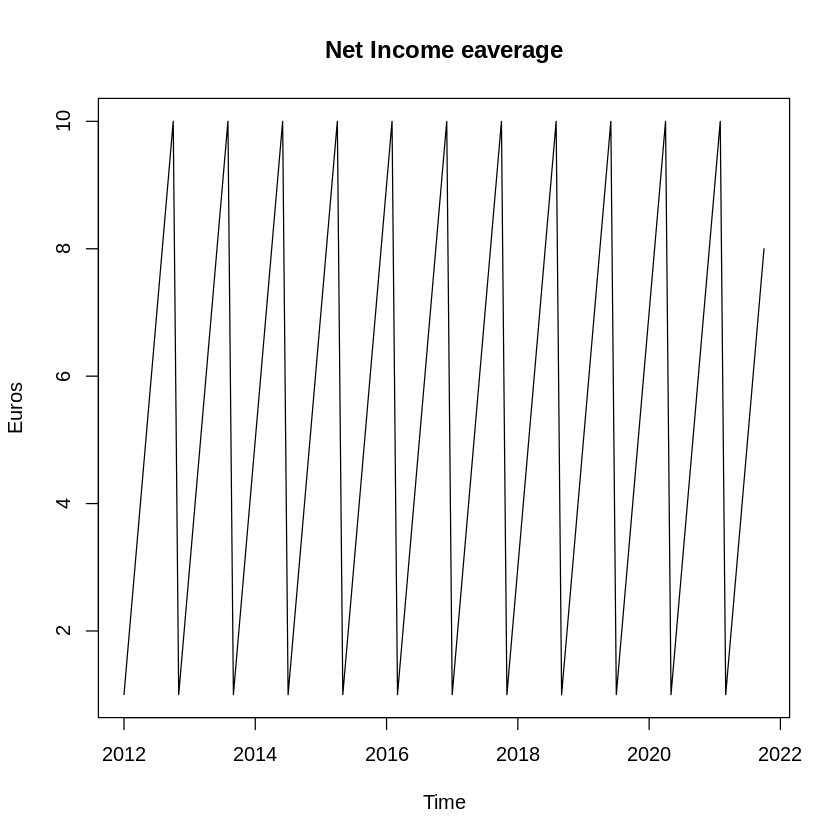

In [78]:
valuesEU = data[2]
valuesEU = ts(valuesEU, start=c(2012, 1), end=c(2021, 10), frequency=12)
ts.plot(valuesEU, main="Net Income eaverage", ylab="Euros")

In [69]:
summary(valuesEU)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   5.432   8.000  10.000 

In [79]:
end(valuesEU)

[1] 2021   10

In [81]:
# Remove first and last columns and then transpose the data set and then converted to a vector 
temp = as.vector(t(data[,-c(1, 39)]))

In [82]:
head(temp)

[1] ""          ""          "14,839.67" "13,578.89" "16,628.54" "1,799.23"

In [89]:
#convert it to time series ts object with starting year 1879 and frequency 12 month
temp = ts(temp,start=2012,frequency=39)

In [90]:
#print the top 10 values
head(temp,10)
#temp

A Time Series:
 [1] ""          ""          "14,839.67" "13,578.89" "16,628.54" "1,799.23" 
 [7] "5,131.47"  "18,017.05" "15,281.22" "4,587.77"

Warning message in xy.coords(x, NULL, log = log, setLab = FALSE):
“NAs introduced by coercion”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: ignored

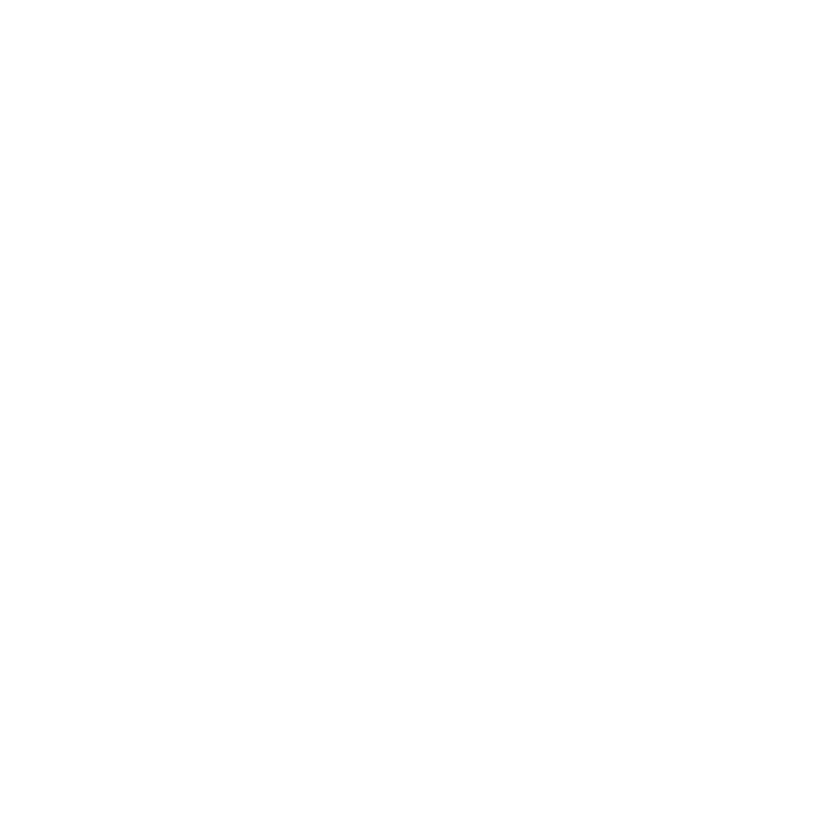

In [91]:
ts.plot(temp,ylab="Co2")